<a href="https://colab.research.google.com/github/anusha-ashwath06/projects/blob/main/Copy_of_fakenews_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this project, we will build a fake news detection model using Natural Language Processing (NLP) techniques. We have a dataset consisting of genuine and fake articles' titles and text, and our goal is to distinguish between them.

## Step 1: Import Necessary Libraries

In [2]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Step 2: Load and Explore the Dataset

In [3]:
# Load the dataset
true_df = pd.read_csv('/True.csv')
false_df = pd.read_csv('/Fake.csv')

# Add labels to indicate real and fake news
true_df['label'] = 1
false_df['label'] = 0

# Concatenate both datasets
data = pd.concat([true_df, false_df])

In [5]:
#True dataset
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
#Fake dataset
false_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Step 3: Data Preprocessing

In [6]:
# Lowercasing and tokenization
data['text'] = data['text'].str.lower()
data['title'] = data['title'].str.lower()
data['text'] = data['text'].apply(nltk.word_tokenize)
data['title'] = data['title'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
data['title'] = data['title'].apply(lambda x: [word for word in x if word not in stop_words])

## Step 4: Feature Extraction (TF-IDF)

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
text_tfidf = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))
title_tfidf = tfidf_vectorizer.transform(data['title'].apply(lambda x: ' '.join(x)))


## Step 5: Split the Data into Training and Testing Sets

In [8]:
X = text_tfidf
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (35918, 5000)
X_test shape: (8980, 5000)
y_train shape: (35918,)
y_test shape: (8980,)


# Step 6: Model Training

 Training our model with different algorithms using the training data and evaluating its performance on the testing data.



# **Multinomial Naive Bayes Model**

# **Decision Tree**

In [12]:
import nltk
from nltk.corpus import stopwords

# Define a function for predicting titles
def predict_title(title_text):
    # Preprocess the title
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]

    # Convert the preprocessed text into TF-IDF vectors
    tfidf_vector = tfidf_vectorizer.transform([" ".join(preprocessed_title_text)])

    # Make the prediction
    prediction = naive_bayes_model.predict(tfidf_vector)

    return prediction

# Example titles
title_text_1 = "Trump do not signs tax, government spending bills into law"
title_text_2 = "FBI Russia probe helped by Australian diplomat tip-off: NYT."

# Predict and display results for both titles
prediction_1 = predict_title(title_text_1)
prediction_2 = predict_title(title_text_2)

if prediction_1 == 1:
    print("Title 1: The news is likely true.")
else:
    print("Title 1: The news is likely fake.")

if prediction_2 == 1:
    print("Title 2: The news is likely true.")
else:
    print("Title 2: The news is likely fake.")


Title 1: The news is likely true.
Title 2: The news is likely true.


Accuracy: 0.94


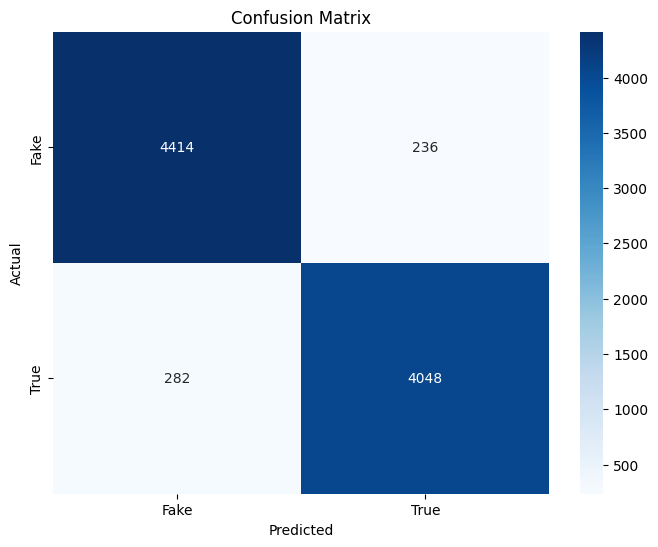

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4650
           1       0.94      0.93      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [11]:
# Initialize and train the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Format and display the metrics
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_rep)
